In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('fmcg.xlsx')

In [3]:
df.head()

,Company,Revenues ($MM),Profit ($MM),Profit as % of Revenues,Category
0,Johnson & Johnson,71890,18540,0.257894,Pharmaceuticals
1,Procter & Gamble,71726,10508,0.146502,Household & Personal Products
2,Pepsico,62789,6329,0.100798,Food
3,Pfizer,52824,7215,0.136586,Pharmaceuticals
4,Coca-Cola,41863,6527,0.155913,Beverages


In [4]:
# Define revenue thresholds for categorical representation
small_threshold = 20000
medium_threshold = 50000

# Categorize companies based on revenue thresholds
def categorize_company_size(revenue):
    if revenue < small_threshold:
        return 'Small'
    elif revenue < medium_threshold:
        return 'Medium'
    else:
        return 'Large'

# Create new feature 'Company_Size_Categorical'
df['Company_Size_Categorical'] = df['Revenues ($MM)'].apply(categorize_company_size)

In [5]:
df.head()

,Company,Revenues ($MM),Profit ($MM),Profit as % of Revenues,Category,Company_Size_Categorical
0,Johnson & Johnson,71890,18540,0.257894,Pharmaceuticals,Large
1,Procter & Gamble,71726,10508,0.146502,Household & Personal Products,Large
2,Pepsico,62789,6329,0.100798,Food,Large
3,Pfizer,52824,7215,0.136586,Pharmaceuticals,Large
4,Coca-Cola,41863,6527,0.155913,Beverages,Medium


### Find the sum of revenue belonging to specific category

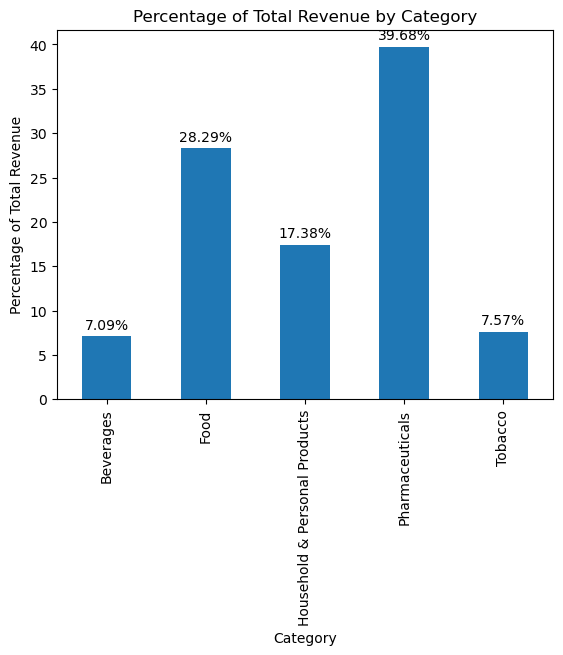

In [6]:
# Calculate total revenue
total_revenue = df['Revenues ($MM)'].sum()

# Group by category and calculate sum of revenues
category_revenue = df.groupby('Category')['Revenues ($MM)'].sum()

# Calculate percentage of revenue for each category
percentage_revenue = (category_revenue / total_revenue) * 100

# Plot the bar plot
ax = percentage_revenue.plot(kind='bar')

# Add data labels as percentages
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, f'{i.get_height():.2f}%', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Percentage of Total Revenue')
plt.title('Percentage of Total Revenue by Category')

# Show plot
plt.show()



### How do revenues and profits vary across different industries?

C:\Users\user\AppData\Local\Temp\ipykernel_7060\1699647112.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Revenues ($MM)', y='Category', estimator=sum, ci=None)
C:\Users\user\AppData\Local\Temp\ipykernel_7060\1699647112.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Profit ($MM)', y='Category', estimator=sum, ci=None)


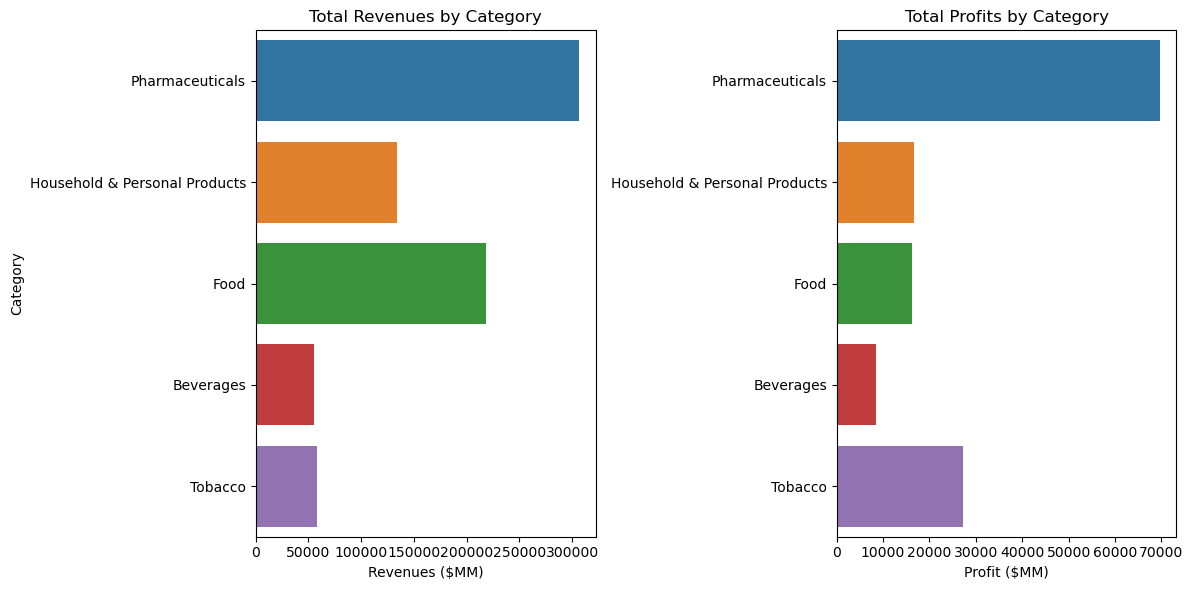

In [7]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Create side-by-side bar plots for revenues and profits by category
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Revenues ($MM)', y='Category', estimator=sum, ci=None)
plt.title('Total Revenues by Category')
plt.xlabel('Revenues ($MM)')
plt.ylabel('Category')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Profit ($MM)', y='Category', estimator=sum, ci=None)
plt.title('Total Profits by Category')
plt.xlabel('Profit ($MM)')
plt.ylabel('')

plt.tight_layout()
plt.show()


### What is the distribution of profit margins within each industry?

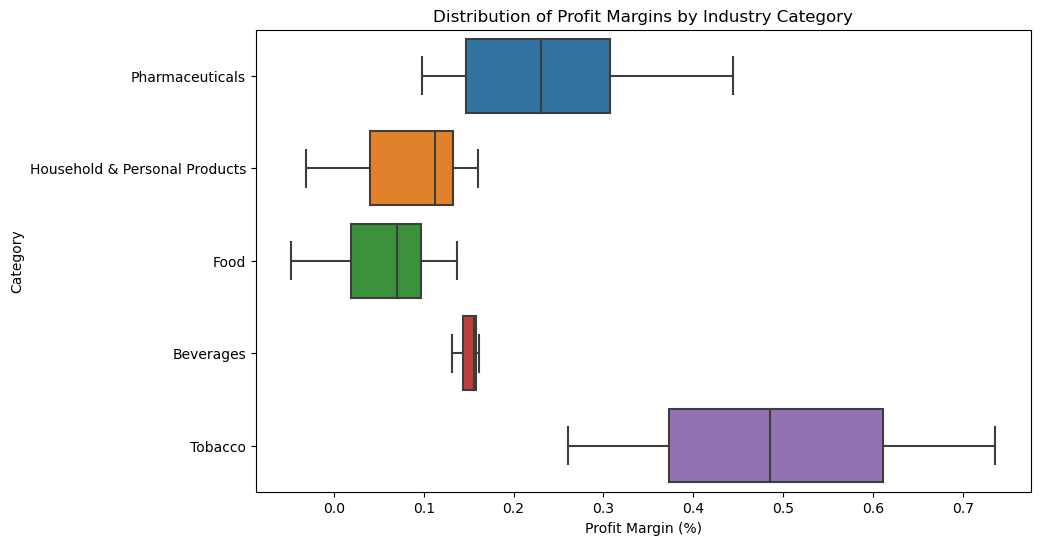

In [8]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Create box plot for profit margins by category
sns.boxplot(data=df, x='Profit as % of Revenues', y='Category')
plt.title('Distribution of Profit Margins by Industry Category')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Category')

plt.show()


### How do the top companies in terms of revenue compare to the top companies in terms of profit?

In [9]:
# Sort the DataFrame by revenue and profit in descending order
df_sorted_revenue = df.sort_values(by='Revenues ($MM)', ascending=False)
df_sorted_profit = df.sort_values(by='Profit ($MM)', ascending=False)

# Get the top companies in terms of revenue and profit
top_companies_revenue = df_sorted_revenue.head(5)
top_companies_profit = df_sorted_profit.head(5)

# Merge the two sets of top companies to identify overlap
top_companies_combined = pd.merge(top_companies_revenue, top_companies_profit, how='inner', on='Company', suffixes=('_revenue', '_profit'))

# Display the combined DataFrame
top_companies_combined

,Company,Revenues ($MM)_revenue,Profit ($MM)_revenue,Profit as % of Revenues_revenue,Category_revenue,Company_Size_Categorical_revenue,Revenues ($MM)_profit,Profit ($MM)_profit,Profit as % of Revenues_profit,Category_profit,Company_Size_Categorical_profit
0,Johnson & Johnson,71890,18540,0.257894,Pharmaceuticals,Large,71890,18540,0.257894,Pharmaceuticals,Large
1,Procter & Gamble,71726,10508,0.146502,Household & Personal Products,Large,71726,10508,0.146502,Household & Personal Products,Large


### Is there a relationship between company size (measured by revenue) and profit margin?

Correlation Coefficient: 0.17


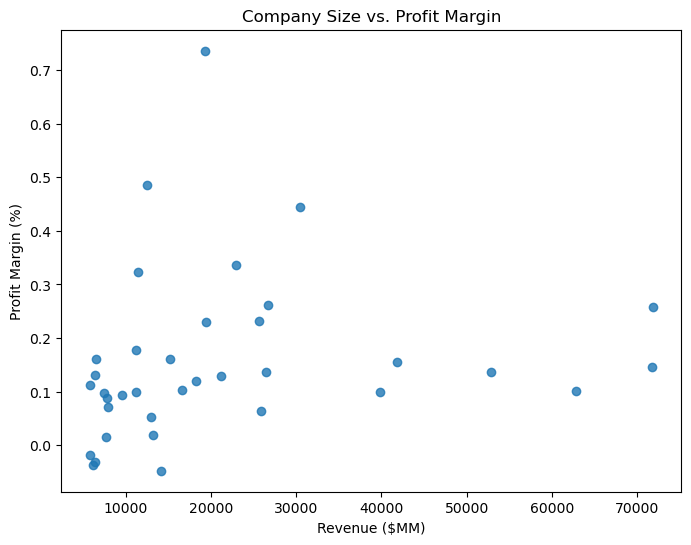

In [10]:
# Set up the plot
plt.figure(figsize=(8, 6))

# Create scatter plot
plt.scatter(df['Revenues ($MM)'], df['Profit as % of Revenues'], alpha=0.8)
plt.title('Company Size vs. Profit Margin')
plt.xlabel('Revenue ($MM)')
plt.ylabel('Profit Margin (%)')

# Calculate correlation coefficient
correlation_coefficient = df['Revenues ($MM)'].corr(df['Profit as % of Revenues'])
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

plt.show()

### What is the market share of each company within its respective industry?

In [11]:
# Calculate total revenue for each industry category
total_revenue_by_category = df.groupby('Category')['Revenues ($MM)'].sum()

# Calculate market share for each company within its industry category
df['Market Share'] = df.apply(lambda row: row['Revenues ($MM)'] / total_revenue_by_category[row['Category']], axis=1)

# Display the DataFrame with market share
df[['Company', 'Category', 'Revenues ($MM)', 'Market Share']]

,Company,Category,Revenues ($MM),Market Share
0,Johnson & Johnson,Pharmaceuticals,71890,0.234271
1,Procter & Gamble,Household & Personal Products,71726,0.533668
2,Pepsico,Food,62789,0.287018
3,Pfizer,Pharmaceuticals,52824,0.172140
4,Coca-Cola,Beverages,41863,0.763213
5,Merck,Pharmaceuticals,39807,0.129721
6,Gilead Sciences,Pharmaceuticals,30390,0.099033
7,Philip Morris International,Tobacco,26685,0.455959
8,Kraft Heinz,Food,26487,0.121076
9,Mondelez International,Food,25923,0.118498


In [12]:
df.to_csv('fmcg_main.csv')

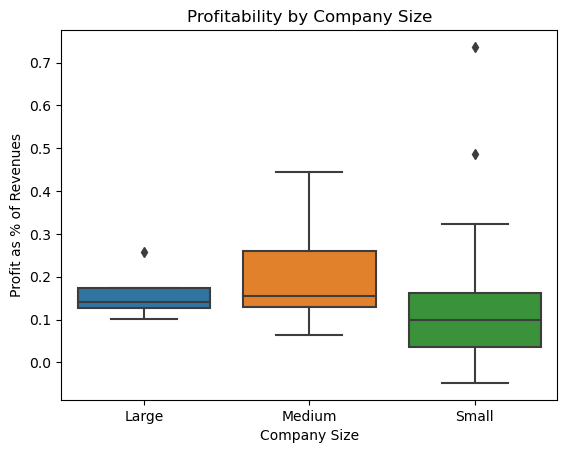

In [14]:

# Plotting the relationship between company size and profitability
sns.boxplot(x='Company_Size_Categorical', y='Profit as % of Revenues', data=df)
plt.title('Profitability by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Profit as % of Revenues')
plt.show()




In [15]:
import pandas as pd
from scipy.stats import f_oneway



# Extract profitability data for each company size category
small = df[df['Company_Size_Categorical'] == 'Small']['Profit as % of Revenues']
medium = df[df['Company_Size_Categorical'] == 'Medium']['Profit as % of Revenues']
large = df[df['Company_Size_Categorical'] == 'Large']['Profit as % of Revenues']

# Perform ANOVA test
statistic, p_value = f_oneway(small, medium, large)

# Set significance level
alpha = 0.05

# Print results
print("ANOVA Test Results:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

# Interpret results
if p_value < alpha:
    print("There are significant differences in profitability among companies of different sizes.")
else:
    print("There are no significant differences in profitability among companies of different sizes.")


ANOVA Test Results:
Test Statistic: 0.6291788605758198
p-value: 0.5393020854290076
There are no significant differences in profitability among companies of different sizes.


In [17]:


# Calculate the correlation coefficient between market share and profitability
correlation = df['Market Share'].corr(df['Profit as % of Revenues'])

print("Correlation coefficient between market share and profitability:", correlation)


Correlation coefficient between market share and profitability: 0.30063147311851207


In [18]:


# Calculate average profitability for each category
average_profitability = df.groupby('Category')['Profit as % of Revenues'].mean().sort_values(ascending=False)

# Identify the most profitable category
most_profitable_category = average_profitability.idxmax()
average_profitability_value = average_profitability.max()

print("Most Profitable Category:", most_profitable_category)
print("Average Profitability:", average_profitability_value)

Most Profitable Category: Tobacco
Average Profitability: 0.4943889257543861


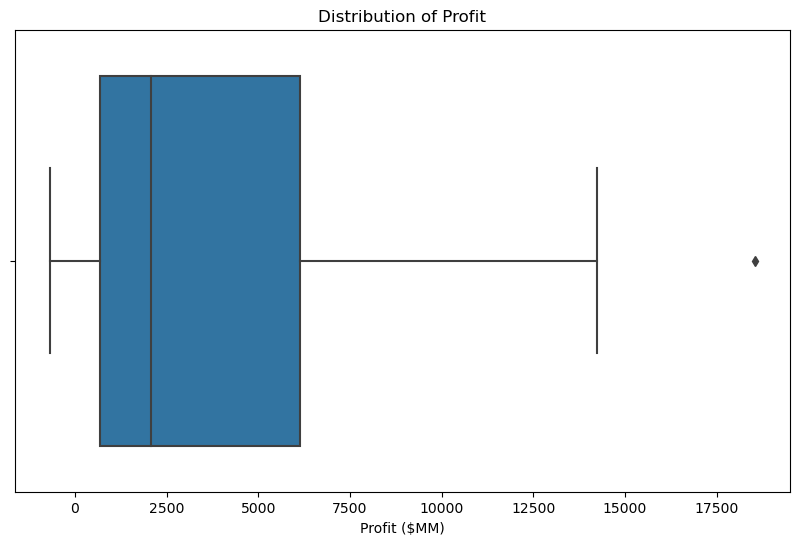

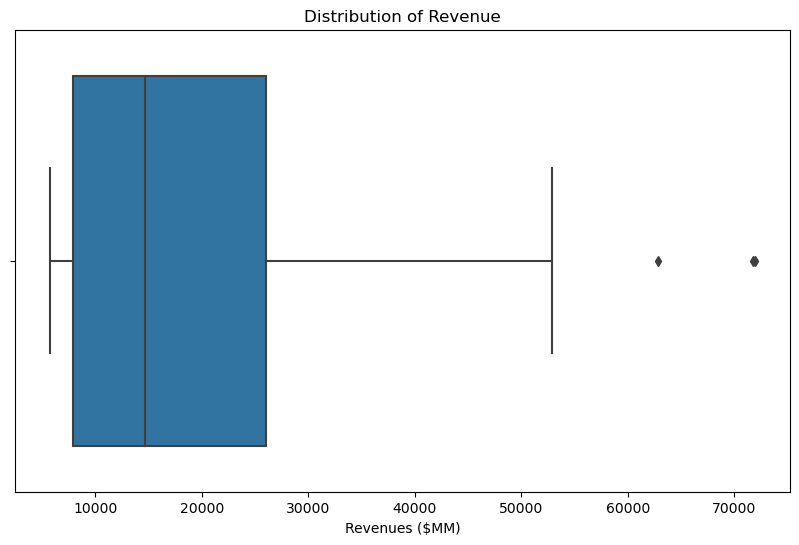

Profit Outliers:
             Company  Revenues ($MM)  Profit ($MM)  Profit as % of Revenues  \
0  Johnson & Johnson           71890         18540                 0.257894   

          Category Company_Size_Categorical  Market Share  Profit Z-Score  \
0  Pharmaceuticals                    Large      0.234271        3.242016   

   Revenue Z-Score  
0         2.763337  

Revenue Outliers:
Empty DataFrame
Columns: [Company, Revenues ($MM), Profit ($MM), Profit as % of Revenues, Category, Company_Size_Categorical, Market Share, Profit Z-Score, Revenue Z-Score]
Index: []


In [19]:


# Visualize distribution of profit using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Profit ($MM)', data=df)
plt.title('Distribution of Profit')
plt.show()

# Visualize distribution of revenue using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Revenues ($MM)', data=df)
plt.title('Distribution of Revenue')
plt.show()

# Calculate z-scores for profit and revenue
df['Profit Z-Score'] = (df['Profit ($MM)'] - df['Profit ($MM)'].mean()) / df['Profit ($MM)'].std()
df['Revenue Z-Score'] = (df['Revenues ($MM)'] - df['Revenues ($MM)'].mean()) / df['Revenues ($MM)'].std()

# Identify outliers based on z-scores (threshold of |z-score| > 3)
profit_outliers = df[abs(df['Profit Z-Score']) > 3]
revenue_outliers = df[abs(df['Revenue Z-Score']) > 3]

print("Profit Outliers:")
print(profit_outliers)
print("\nRevenue Outliers:")
print(revenue_outliers)

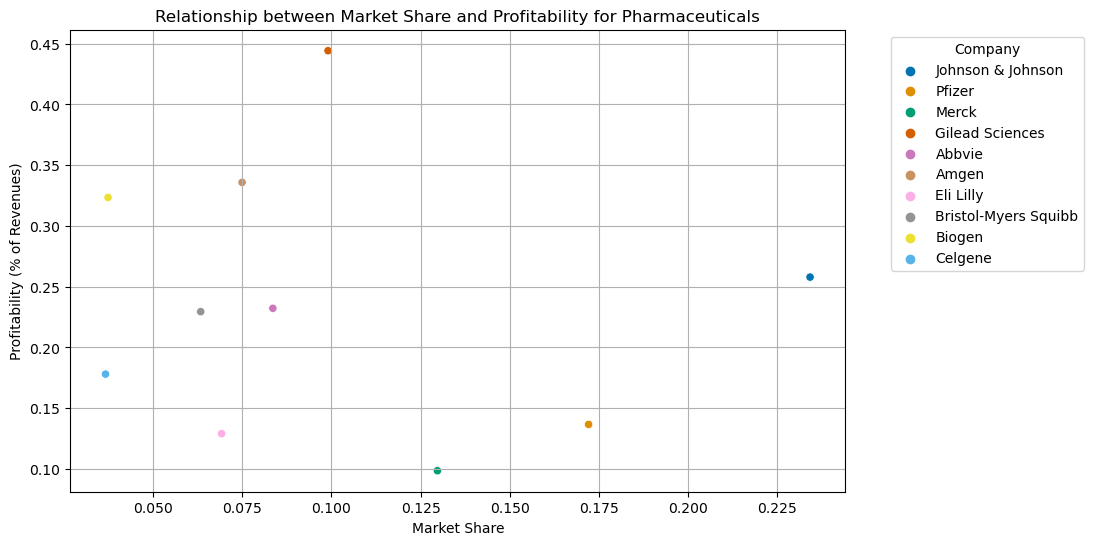

In [20]:
# Select a specific category for analysis (e.g., Pharmaceuticals)
category = 'Pharmaceuticals'

# Filter data for the selected category
category_data = df[df['Category'] == category]

# Visualize the relationship between market share and profitability using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Market Share', y='Profit as % of Revenues', data=category_data, hue='Company', palette='colorblind')
plt.title('Relationship between Market Share and Profitability for {}'.format(category))
plt.xlabel('Market Share')
plt.ylabel('Profitability (% of Revenues)')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()